# Thực hành

In [ ]:
#1
import numpy as np
signals = np.array([[1, 2],
                    [3, 4],
                    [10, 0]])

sample = np.array([3, -1])

result = np.inner(signals, sample)

# In kết quả
print(result)


[ 1  5 30]


In [ ]:
#1.1
import numpy as np
A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])
print("Độ dài A và search_vector:", len(A), len(search_vector))
B = np.array([1])  # khởi tạo tạm
B = np.resize(B, (len(A) - len(search_vector) + 1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A) - len(search_vector) + 1):
    for j in range(len(search_vector)):
        B[i, j] = A[i + j]
print("Ma trận B chứa các đoạn con:")
print(B)
C = np.inner(B, search_vector)

print("Vị trí khớp:")
for i in range(len(A) - len(search_vector) + 1):
    if C[0, i] == np.inner(search_vector, search_vector):
        print(f"Vị trí {i}, đoạn: {B[i]}")


Độ dài A và search_vector: 10 3
Ma trận B chứa các đoạn con:
[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]
Vị trí khớp:
Vị trí 6, đoạn: [[ 0  1 -1]]


In [1]:
from PIL import Image

# Mở ảnh gốc
img = Image.open('D:/traidat.PNG')

# Kiểm tra chiều cao, chiều rộng và kiểu ảnh
print("Chiều cao:", img.height)
print("Chiều rộng:", img.width)
print("Kiểu ảnh:", img.mode)

# Nếu ảnh là kiểu 'P' thì chuyển sang RGB để xử lý đúng
if img.mode == 'P':
    img = img.convert("RGB")

# Giảm một nửa kích thước ảnh
new_width = img.width // 2
new_height = img.height // 2

# Tạo ảnh mới với kích thước nhỏ hơn
new_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Lưu ảnh thu nhỏ
new_img.save('D:/traidat_small.PNG')

print("Ảnh thu nhỏ đã được lưu tại: D:/traidat_small.PNG")


FileNotFoundError: [Errno 2] No such file or directory: 'D:/traidat.PNG'

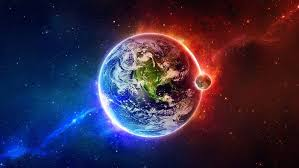

In [ ]:
from PIL import Image, ImageDraw

# Mở ảnh gốc
input_image = Image.open('D:/traidat.PNG').convert("RGB")
input_pixels = input_image.load()

# Khai báo kernel làm mờ (box blur)
box_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]
kernel = box_kernel
offset = len(kernel) // 2  # offset = 1 với kernel 3x3

# Tạo ảnh đầu ra
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

width, height = input_image.size

# Duyệt từng pixel (trừ biên)
for x in range(offset, width - offset):
    for y in range(offset, height - offset):
        r, g, b = 0, 0, 0
        for i in range(len(kernel)):
            for j in range(len(kernel[0])):
                px = input_pixels[x + i - offset, y + j - offset]
                weight = kernel[i][j]
                r += px[0] * weight
                g += px[1] * weight
                b += px[2] * weight
        # Vẽ pixel mới
        draw.point((x, y), (int(r), int(g), int(b)))

# Lưu ảnh làm mờ
output_image.save("D:/traidat_blurred_box.png")
print("✅ Ảnh đã được làm mờ và lưu tại: D:/traidat_blurred_box.png")


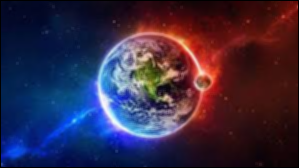

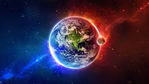

# Bài tập

In [1]:
#Bài 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/TRAIDDAT.PNG', cv2.IMREAD_GRAYSCALE)
# Tạo kernel Gaussian 5x5 (theo đề bài)
gauss_kernel = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
# Áp dụng bộ lọc
blurred = cv2.filter2D(image, -1, gauss_kernel)
# Hiển thị kết quả
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Ảnh làm mờ Gaussian')
plt.axis('off')

plt.tight_layout()
plt.show()


Không tìm thấy ảnh!


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1528: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


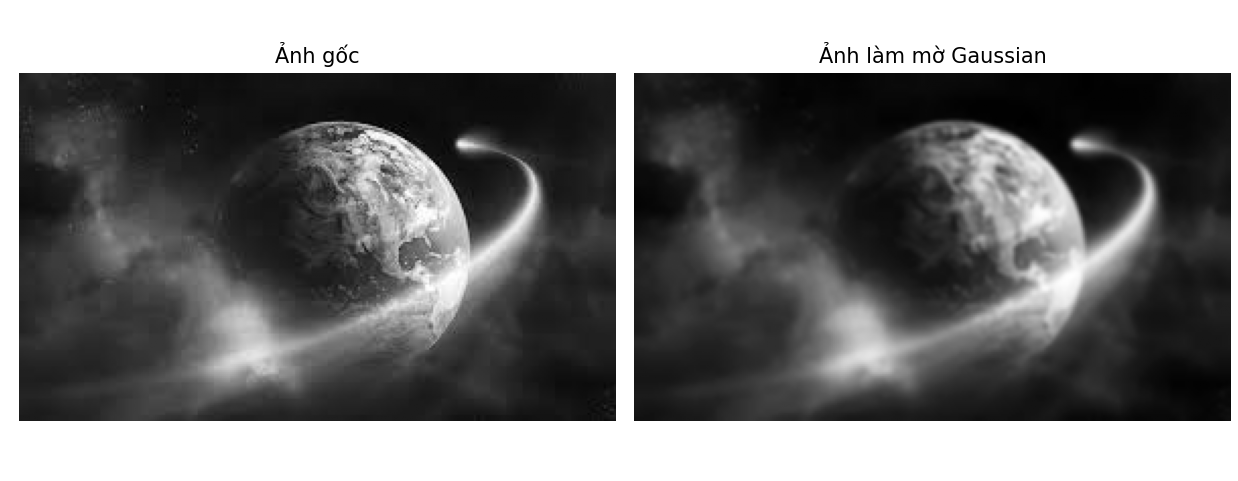

In [2]:
#Bài 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/TRAIDDAT.PNG', cv2.IMREAD_GRAYSCALE)

# Kernel A (4 hướng)
kernel_a = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
# Kernel B (8 hướng)
kernel_b = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])
# Áp dụng bộ lọc
filtered_a = cv2.filter2D(image, -1, kernel_a)
filtered_b = cv2.filter2D(image, -1, kernel_b)
# Hiển thị kết quả
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_a, cmap='gray')
plt.title('Kết quả Kernel A (4 hướng)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_b, cmap='gray')
plt.title('Kết quả Kernel B (8 hướng)')
plt.axis('off')

plt.tight_layout()
plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1528: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


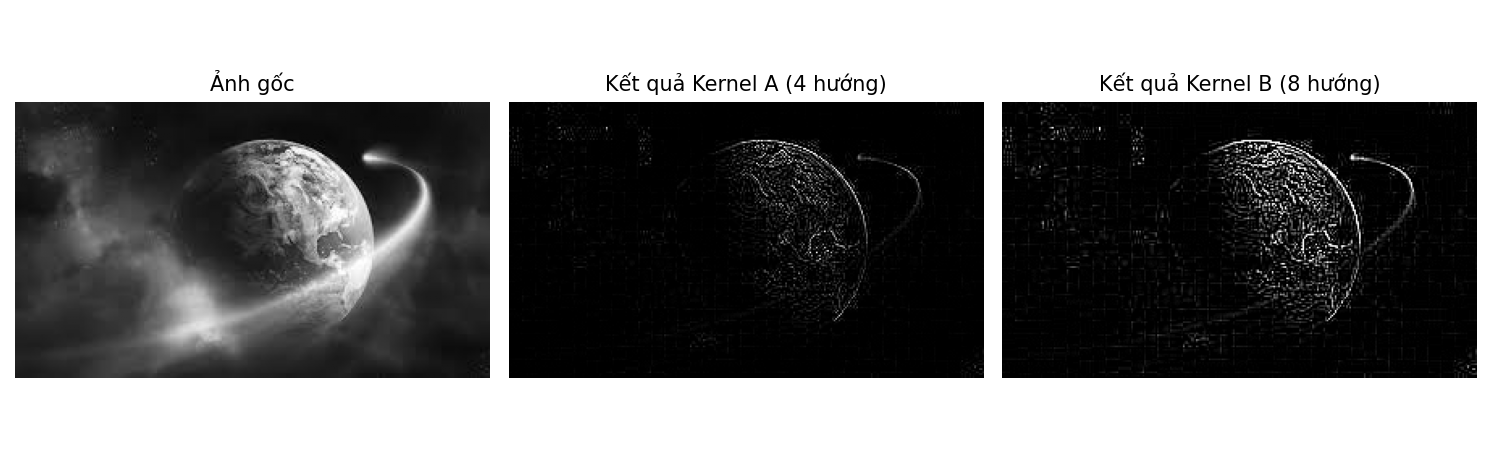